# Notas de estudo


Elaboradas a partir da leitura do livro Elementary Mechanics Using Python, Anders Malthe-Sorenssen, Springer 2015.

In [86]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import *

Funções de calculadora científica e arrendondamentos da biblioteca NumPy:

In [87]:
np.round(sin (pi/6),2)

0.5

In [88]:
sin(pi/6)

0.49999999999999994

Do ponto de vista da prática de programação, funções devem ser implementadas sempre que possível buscando a otimização código.

In [89]:
def convertF(TC):
    # Converts from Celsius to Fahrenheit
    TF=9.0/5.0*TC+32.0
    return TF

convertF(38)

100.4

## Plotting Data-Sets

Número de entradas: 6,6


Text(0, 0.5, 'V (l)')

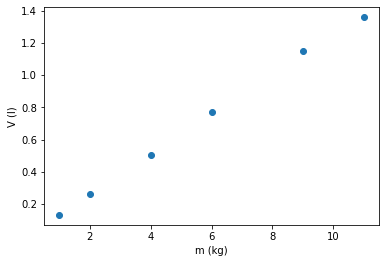

In [90]:
m=array([1.0,2.0,4.0,6.0,9.0,11.0])
V=array([0.131,0.261,0.501,0.771,1.151,1.361])

print(f'Número de entradas: {len(m)},{len(V)}')

plot(m,V,'o') #a string 'o' indica que deve ser plotado um pequeno círculo
xlabel('m (kg)')
ylabel('V (l)')

## Plotting a Function

Python cannot plot a function directly. We must first generate the sequences of: x values; and the function values.

Array from 0.0 to 10.0.

Numbers of elements $$n=\frac{10.0-0.0}{0.1}+1$$

In [91]:
x0=0.0
x1=10.0
dx=0.1

#The method ceil() in Python returns ceiling value
n=int(ceil(((x1-x0)/dx)+1))
print(n)
print(type(n))

101
<class 'int'>


Criando um conjunto float (array) por intermédio da função```zeros()```

In [92]:
x=zeros((n,1),float)
y=zeros((n,1),float)

print(type(x))

<class 'numpy.ndarray'>


Filling the array:

Text(0, 0.5, 'f(x)')

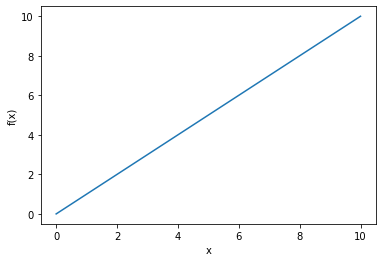

In [93]:
for i in range(n):
    x[i] = i*0.1
    y[i] = i*0.1
    
plot(x,y)
xlabel('x')
ylabel('f(x)')

Utilizando o looping ```for```


Text(0, 0.5, 'f(x)')

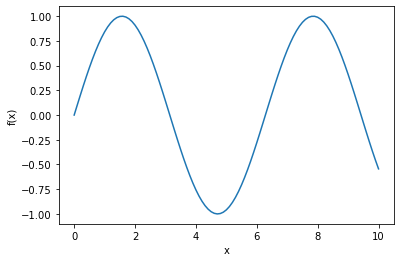

In [94]:
for i in range(n):
    x[i] = x0+i*dx
    y[i] = sin(x[i])
    
plot(x,y)
xlabel('x')
ylabel('f(x)')

Utilizando o looping ```while```

Text(0, 0.5, 'f(x)')

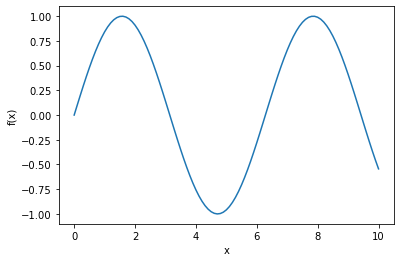

In [95]:
i = 0
while i < n:
    x[i] = x0+i*dx
    y[i] = sin(x[i])
    i = i+1
    
plot(x,y)
xlabel('x')
ylabel('f(x)')

### Exercício

Elaboração de uma rotina iterativa com a função ```while``` para determinar o tempo que um objeto em queda livre leva para tocar o 

Tempo para tocar o solo: [2.475]
Altura final: [-0.0155625]
Número de iterações: 2475


Text(0, 0.5, 'altura de lançamento')

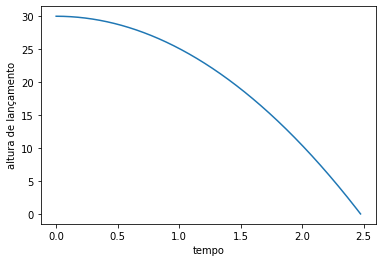

In [96]:
#Determinando o domínio do problema e o intervalo
t0 = 0.0 #s
t1 = 10.0 #s
dt = 0.001 #s

#Altura inicial em metros
h = 30.0 #m

#Determinando o número elementos necessários para discretizar o tempo
m = int(ceil(((t1-t0)/dt)+1))

#Criando o conjunto de variáveis (independente e dependnte)
t = zeros((m,1),float)
z = zeros((m,1),float)


#Iniciando o contador e a variável
j = 0
z[j] = h - 4.9 * t[j]**2

while z[j] > 0:
    j = j+1
    t[j] = j*dt
    z[j] = h - 4.9 * t[j]**2
    
print(f'Tempo para tocar o solo: {t[j]}\nAltura final: {z[j]}\nNúmero de iterações: {j}')
    
plot(t[0:j],z[0:j])
xlabel('tempo')
ylabel('altura de lançamento')

## Vectorization Tool
Using the Python Vectorization Tool and option ```':'``` to plot a dotted line

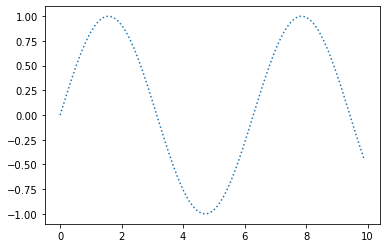

In [97]:
k = arange(0.0,10.0,0.1)
l = sin(k)
plot(k,l,':')

In [98]:
x = linspace(0,10,10)
print(x)

[ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
  6.66666667  7.77777778  8.88888889 10.        ]


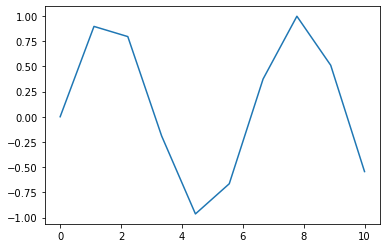

In [99]:
y = sin(x)
plot(x,y)

## Randon Numbers

In [100]:
for i in range(3):
    print(randint(6))

2
0
4


### Brownian motion

Modeling the motion of the grain of dust.
For each step, the grain moves a distance dx= +/-1.
If the grain is at position $x_i$, at step $i$, the grain will be at a position $$x_{i+1}=x_i+dx$$ at step $i+1$

In [101]:
for i in range(3):
    if (randint(6)+1) < 4:
        print('move fwd')
    else:
        print('move bwd')

move bwd
move bwd
move bwd


Text(0, 0.5, 'f(i)')

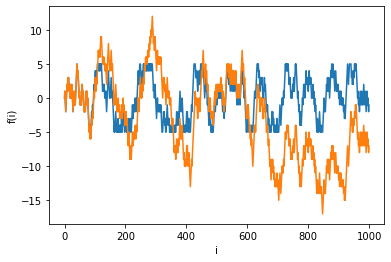

In [103]:
n = 1000
x = zeros(n,float)
y = zeros(n,float)

for i in range(n-1):
    
    # define the moviment back or forth
    if (randint(6)+1) < 4:
        dx = -1
    else:
        dx = 1
    
    # computing each step with a limit of +/-5
    if x[i]+dx > 5:
        x[i+1] = 5
    elif x[i]+dx < -5:
        x[i+1] = -5
    else:
        x[i+1] = x[i]+dx
        
    y[i+1] = y[i]+dx

plot(x)
plot(y)
xlabel('i')
ylabel('f(i)')

## Reading real data

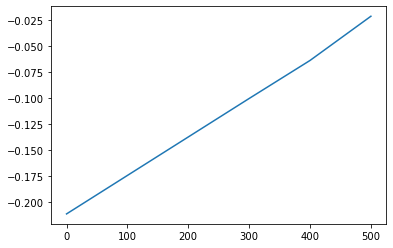

In [104]:
run100m = loadtxt('input_run100m.txt')

t = run100m[:,0]
x = run100m[:,1]

plot(t,x)

## Plot a function and its derivative

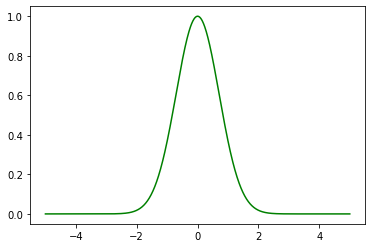

In [108]:
#linspace return evenly spaced numbers over a specified interval.

x = linspace(-5,5,1000)

f = exp(-x**2)

plot(x,f,'-g')

## Numerical approach

### Aproximação 1: 
$$ f'(x)\approx \frac{f(x+h)-f(x-h)}{2h}.$$

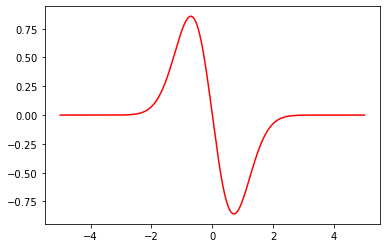

In [110]:
h = 1/1000
df0 = zeros(1000,float)

for i in range(len(df0)):
    df0[i]=(exp(-(x[i]+h)**2)-exp(-(x[i]-h)**2))/(2*h)

plot(x,df0,'-r')
savefig('myfigure.pdf')

### Aproximação 2: 
$$ f'(x)\approx \frac{f(x)-f(x-h)}{h}.$$

Text(0.5, 0, 'x')

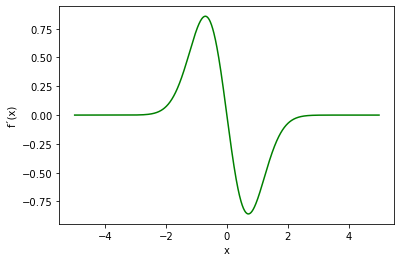

In [111]:
df1 = zeros(1000,float)

for i in range(len(df1)):
    df1[i] = (exp(-(x[i])**2)-exp(-(x[i]-h)**2))/h

plot(x,df1,'-g')
ylabel('f´(x)')
xlabel('x')

## Plotting two data sets

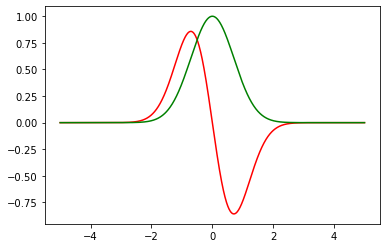

In [112]:
g = exp(-x**2)
h = -2 * x * exp(-x**2)

plot (x,h,'-r',x,g,'-g')

## Combining plots

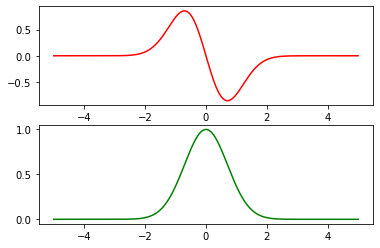

In [113]:
subplot(2,1,1)
plot(x,h,'-r')

subplot(2,1,2)
plot(x,g,'-g')

#saving the figure
#savefig('TrashIt_myFigure.pdf')